In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
def search_neighbors(db, point, eps):
    distances = pd.DataFrame(cdist([db.iloc[point, :-1].values], db.iloc[:, :-1]).T, columns=['value'])
    neighbors = distances[distances['value'] <= eps].index
    return neighbors

def dbscan(db, eps, min_points):
    c = 0
    db['labels'] = np.nan
    for point in range(len(db)):
        if pd.notnull(db.iloc[point, -1]):
            continue
        neighbors = search_neighbors(db, point, eps)
        if len(neighbors) < min_points:
            db.iloc[point, -1] = 0
            continue
        c += 1
        db.iloc[point, -1] = c
        s = neighbors.drop(point)
        for point_s in s:
            if db.iloc[point_s, -1] == 0:
                db.iloc[point_s, -1] = c
            if pd.notnull(db.iloc[point_s, -1]):
                continue
            db.iloc[point_s, -1] = c
            n = set(search_neighbors(db, point_s, eps))
            if len(n) >= min_points:
                s = list(set(s).union(n))

    return db

In [3]:
X, y = make_blobs(n_samples=300, centers=[[5, 5], [5, -5], [-5, 5]], n_features=2, random_state=0)
standard_scaler = StandardScaler()
df = pd.DataFrame(standard_scaler.fit_transform(X))

In [4]:
df_predict = dbscan(df, 1, 10)

In [5]:
df_predict.labels.value_counts()

labels
1.0    100
2.0    100
3.0    100
Name: count, dtype: int64

Text(0, 0.5, 'Feature 2')

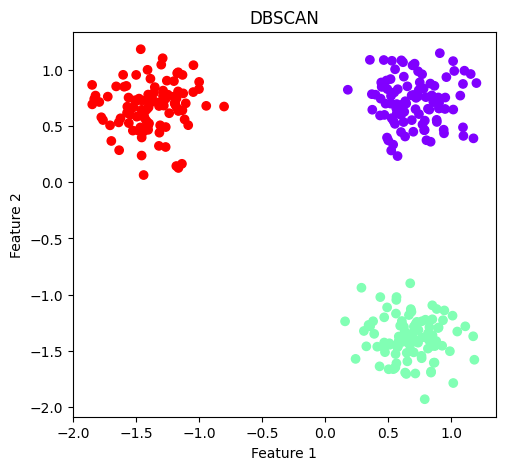

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(df_predict.iloc[:, 0], df_predict.iloc[:, 1], c=df_predict['labels'], cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")